# EDA and Hypothesis Testing for Insurance Cost Prediction
For the Insurance Cost Prediction project, EDA will involve visualizing distributions, identifying outliers, and exploring correlations between different variables like age, diabetes status, weight, and premium costs. This analysis aims to unearth significant predictors of insurance costs and understand the demographic and health-related characteristics that most influence premium pricing.

Hypothesis testing will be used to formally test assumptions such as:
* Are premium costs significantly higher for smokers compared to non-smokers?
* Does the presence of chronic diseases lead to higher insurance premiums?
* Is there a significant difference in premium costs based on the number of major surgeries a person has had?

These statistical tests will help validate whether the observed patterns in the data are statistically significant or occur by chance, thereby reinforcing the robustness of subsequent predictive modeling.

***1. Exploratory Data Analysis (EDA)***

**Distribution Analysis**

To understand the distribution of variables, create visualizations that may not be easily achievable in Tableau due to customization limitations (e.g., layered plots, kernel density estimates, or specific styling).

* Univariate Analysis:
   * Numeric Variables (Age, Height, Weight, NumberOfMajorSurgeries, PremiumPrice):
        * Plot histograms with kernel density estimates (KDE) to visualize distributions.
        * Use boxplots to highlight spread, skewness, and potential outliers.
        * Example: For PremiumPrice, a histogram with KDE can show if the distribution is skewed or multimodal.
* Binary/Categorical Variables (Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryOfCancerInFamily):
    * Use bar plots or count plots to show the frequency of 0s and 1s.
    * Example: A count plot for Diabetes will show the proportion of individuals with (1) and without (0) diabetes.
* NumberOfMajorSurgeries:
    * Since it ranges from 0 to 3, treat it as a categorical variable for visualization. Use a bar plot to show the count of individuals for each surgery count.
        
* Custom Visualizations (Not Easily Done in Tableau):
    * Violin Plots: Combine density and boxplot information to show the distribution of PremiumPrice across categories like Diabetes or NumberOfMajorSurgeries.
    * Pair Plots: Use Seaborn’s pairplot to visualize pairwise relationships and distributions for numeric variables (Age, Height, Weight, PremiumPrice).
    * Facet Grids: Create faceted histograms or boxplots to compare distributions of PremiumPrice across binary variables (e.g., Diabetes = 0 vs. Diabetes = 1).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load dataset (replace with your data)
df = pd.read_csv('C://Users//dell//OneDrive//Desktop//Scaler Certificates//Project Portfolio//Insurance Cost Prediction//insurance.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [10]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
Age                        0.0
Diabetes                   0.0
BloodPressureProblems      0.0
AnyTransplants             0.0
AnyChronicDiseases         0.0
Height                     0.0
Weight                     0.0
KnownAllergies             0.0
HistoryOfCancerInFamily    0.0
NumberOfMajorSurgeries     0.0
PremiumPrice               0.0
dtype: float64


In [11]:
# Optional: Check if there are any missing values in the dataset
if missing_values.sum() == 0:
    print("\nNo missing values in the dataset.")
else:
    print(f"\nTotal number of missing values: {missing_values.sum()}")


No missing values in the dataset.


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


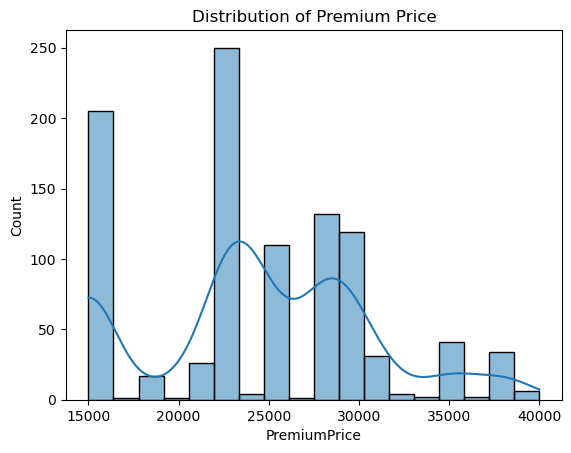

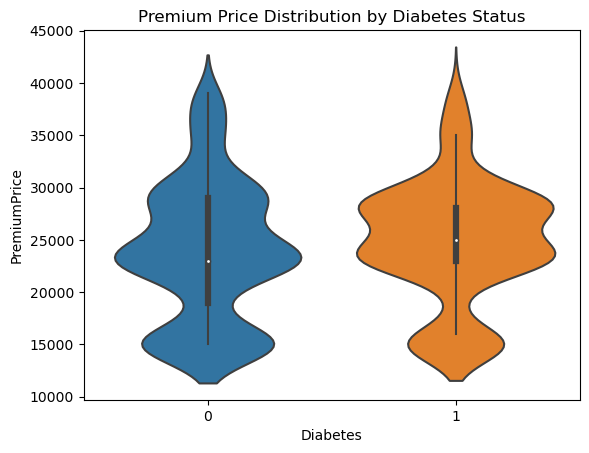

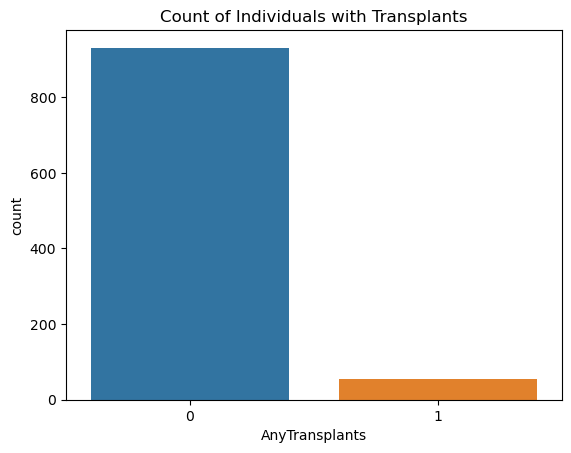

In [12]:
# Histogram with KDE for PremiumPrice
sns.histplot(df['PremiumPrice'], kde=True)
plt.title('Distribution of Premium Price')
plt.show()

# Violin plot for PremiumPrice by Diabetes
sns.violinplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title('Premium Price Distribution by Diabetes Status')
plt.show()

# Count plot for binary variables
sns.countplot(x='AnyTransplants', data=df)
plt.title('Count of Individuals with Transplants')
plt.show()

### Correlation Analysis
To identify relationships between variables and PremiumPrice, focus on numeric and binary variables.

* Correlation Matrix:
    * Compute Pearson correlation coefficients for numeric variables (Age, Height, Weight, NumberOfMajorSurgeries, PremiumPrice).
    * For binary variables, consider point-biserial correlation with PremiumPrice.
    * Visualize using a heatmap to highlight strong correlations.
* Focus on PremiumPrice:
    * Identify which variables have the strongest linear relationship with PremiumPrice.
    * Example: Age or Weight may show positive correlations with PremiumPrice.

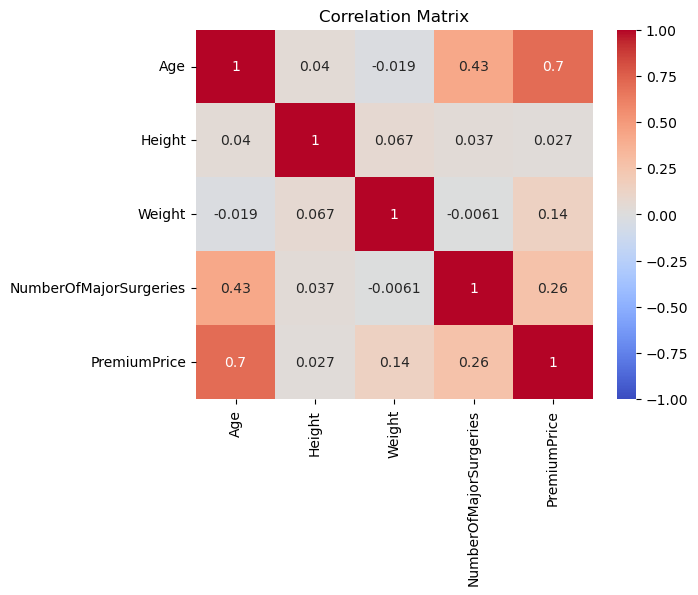

Point-biserial correlation between Diabetes and PremiumPrice: 0.076, p-value: 0.017
Point-biserial correlation between BloodPressureProblems and PremiumPrice: 0.167, p-value: 0.000
Point-biserial correlation between AnyTransplants and PremiumPrice: 0.289, p-value: 0.000


In [4]:
# Correlation matrix
corr_matrix = df[['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Point-biserial correlation for binary variables
from scipy.stats import pointbiserialr
for col in ['Diabetes', 'BloodPressureProblems', 'AnyTransplants']:
    corr, p = pointbiserialr(df[col], df['PremiumPrice'])
    print(f'Point-biserial correlation between {col} and PremiumPrice: {corr:.3f}, p-value: {p:.3f}')

### Outlier Detection
Outliers can skew analyses and predictive models, so identify and assess them in numeric variables.

* Methods:
    * IQR Method:
        * Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Q3 - Q1).
        * Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
        * Apply to Age, Height, Weight, PremiumPrice.
    * Z-Score Method:
        * Calculate Z-scores: (x - mean) / std.
        * Flag values with |Z| > 3 as outliers.
        * Useful for normally distributed variables.
* Impact Assessment:
    * Visualize outliers using boxplots or scatter plots.
    * Check if outliers in Weight or PremiumPrice correspond to specific health conditions (e.g., Diabetes or AnyTransplants).
    * Decide whether to remove, cap, or transform outliers based on their impact on correlations or model performance.

Number of outliers in PremiumPrice: 6


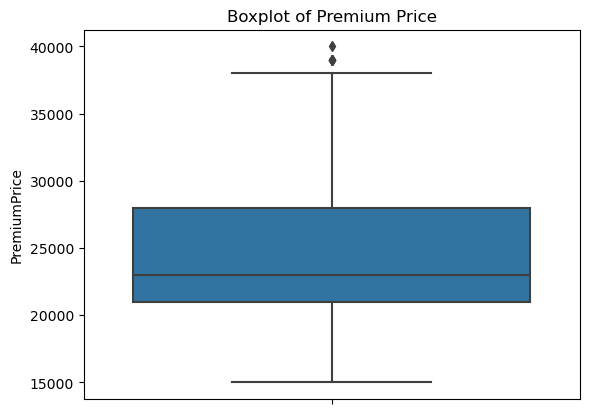

In [5]:
# IQR method for PremiumPrice
Q1 = df['PremiumPrice'].quantile(0.25)
Q3 = df['PremiumPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['PremiumPrice'] < lower_bound) | (df['PremiumPrice'] > upper_bound)]
print(f'Number of outliers in PremiumPrice: {len(outliers)}')

# Boxplot to visualize outliers
sns.boxplot(y=df['PremiumPrice'])
plt.title('Boxplot of Premium Price')
plt.show()

***2. Hypothesis Testing***
Hypothesis testing will validate whether observed patterns (e.g., higher premiums for certain groups) are statistically significant. Below, I address the suggested tests and adapt them to the dataset, noting that “smokers” is not a variable in the provided dataset, so I’ll replace it with a relevant variable like Diabetes or AnyChronicDiseases.

**T-tests/ANOVA**

Use these to compare PremiumPrice means across groups defined by categorical variables.

* Hypothesis 1: Premium costs are significantly higher for individuals with diabetes compared to those without.
    * Test: Independent two-sample t-test.
    * Null Hypothesis (H0): Mean PremiumPrice for Diabetes = 0 equals mean PremiumPrice for Diabetes = 1.
    * Alternative Hypothesis (H1): Mean PremiumPrice for Diabetes = 1 is greater.
    * Assumptions: Check normality (Shapiro-Wilk test) and equal variances (Levene’s test). If violated, use Welch’s t-test.
* Hypothesis 2: Premium costs differ significantly based on the number of major surgeries.
    * Test: One-way ANOVA (since NumberOfMajorSurgeries has 4 levels: 0, 1, 2, 3).
    * Null Hypothesis (H0): Mean PremiumPrice is the same across all levels of NumberOfMajorSurgeries.
    * Alternative Hypothesis (H1): At least one group mean differs.
    * Post-hoc: If ANOVA is significant, use Tukey’s HSD to identify which groups differ.
    * Assumptions: Normality and homogeneity of variances. If violated, use Kruskal-Wallis test.

In [6]:
from scipy.stats import ttest_ind, f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# T-test for Diabetes
diab_0 = df[df['Diabetes'] == 0]['PremiumPrice']
diab_1 = df[df['Diabetes'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(diab_1, diab_0, alternative='greater', equal_var=False)  # Welch’s t-test
print(f'T-test for Diabetes: t={t_stat:.3f}, p-value={p_val:.3f}')

# ANOVA for NumberOfMajorSurgeries
groups = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in range(4)]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA for NumberOfMajorSurgeries: F={f_stat:.3f}, p-value={p_val:.3f}')

# Post-hoc test (if ANOVA is significant)
if p_val < 0.05:
    tukey = pairwise_tukeyhsd(df['PremiumPrice'], df['NumberOfMajorSurgeries'])
    print(tukey)

T-test for Diabetes: t=2.449, p-value=0.007
ANOVA for NumberOfMajorSurgeries: F=26.135, p-value=0.000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 1773.2507 0.0001   702.2872 2844.2142   True
     0      2 5115.3489    0.0  3528.0508 6702.6469   True
     0      3 5031.3152 0.0058  1092.8776 8969.7529   True
     1      2 3342.0981    0.0  1710.0051 4974.1912   True
     1      3 3258.0645 0.1477  -698.6392 7214.7682  False
     2      3  -84.0336 0.9999 -4210.5402 4042.4729  False
----------------------------------------------------------


### Chi-square Tests
Use to test associations between categorical variables.

* ***Hypothesis 3:*** The presence of chronic diseases is associated with a family history of cancer.
    * Test: Chi-square test of independence.
    * Null Hypothesis (H0): AnyChronicDiseases and HistoryOfCancerInFamily are independent.
    * Alternative Hypothesis (H1): They are associated.
    * Assumptions: Expected frequencies should be ≥5 in at least 80% of cells.

In [7]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2={chi2:.3f}, p-value={p:.3f}')

Chi-square test: chi2=0.021, p-value=0.886


### Regression Analysis
Use linear regression to quantify the impact of predictors on PremiumPrice and test hypotheses.

* ***Hypothesis 4:*** The presence of chronic diseases significantly increases premium prices, controlling for other factors.
    * Model: Linear regression with PremiumPrice as the dependent variable and predictors like AnyChronicDiseases, Age, Weight, NumberOfMajorSurgeries, etc.
    * Null Hypothesis (H0): The coefficient for AnyChronicDiseases is zero.
    * Alternative Hypothesis (H1): The coefficient is non-zero.
    * Assumptions: Linearity, independence, homoscedasticity, normality of residuals. Check residuals plots and Durbin-Watson test.

In [8]:
import statsmodels.api as sm

# Prepare data
X = df[['AnyChronicDiseases', 'Age', 'Weight', 'NumberOfMajorSurgeries']]
X = sm.add_constant(X)  # Add intercept
y = df['PremiumPrice']

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Check coefficient for AnyChronicDiseases
print(f'Coefficient for AnyChronicDiseases: {model.params["AnyChronicDiseases"]:.3f}, p-value: {model.pvalues["AnyChronicDiseases"]:.3f}')

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.04e-165
Time:                        01:19:16   Log-Likelihood:                -9629.5
No. Observations:                 986   AIC:                         1.927e+04
Df Residuals:                     981   BIC:                         1.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5390

### Summary of Actions
1. EDA:
    * Plot histograms, violin plots, and pair plots for distributions.
    * Create a correlation heatmap and compute point-biserial correlations.
    * Detect outliers using IQR and visualize with boxplots.
2. Hypothesis Testing:
    * T-test for Diabetes vs. PremiumPrice.
    * ANOVA for NumberOfMajorSurgeries vs. PremiumPrice.
    * Chi-square test for AnyChronicDiseases vs. HistoryOfCancerInFamily.
    * Linear regression to test the impact of AnyChronicDiseases and other predictors.

# Insights
* No Link Between Cancer History and Chronic Diseases:
    * Family history of cancer and chronic diseases (like diabetes) aren’t related in this data (p = 0.886). They don’t affect each other.
    * Insurance Impact: Treat them as separate risk factors. Cancer history doesn’t mean higher chronic disease risk, so price them independently.
    * Data Note: Chronic diseases may not be tied to cancer genetics. The dataset (986 records) might be too small or lack details (e.g., specific cancer types).

* Surgeries Increase Premiums, But Plateau:
    * Premiums rise with more surgeries: 1 surgery adds ~1773 compared to 0, and 2 surgeries add ~5115 (significant jumps).
    * Premiums for 2 and 3 surgeries are similar (no significant difference), suggesting a plateau after 1 surgery.
    * Insurance Pricing: Charge higher premiums for those with any surgeries, especially 2+, as they’re higher risk.
    * Data Note: Few people have 3 surgeries, which might explain the lack of difference (check sample size with df['NumberOfMajorSurgeries'].value_counts()).

* PremiumPrice Distribution:
    * Most premiums are 20,000–30,000, with a median of 25,000 (half pay less, half pay more). Non-outlier range is 15,000–35,000.
    * Outliers: 6 outliers at ~40,000, likely high-risk people (e.g., with chronic diseases, transplants, or many surgeries).
    * Skewness: Slightly right-skewed (longer tail at higher premiums), matching regression skewness (1.782).

* Bimodal Distribution:
    * Two main premium groups: 15,000–20,000 (low-risk) and 25,000 (medium-risk). Smaller peaks at 30,000 and 40,000 show a few high-risk cases.
    * Diabetes Effect: People with diabetes have a slightly higher median (26,000 vs. 25,000) and more premiums at 30,000+, confirmed by T-test (p = 0.007).
    * Insurance Pricing: Diabetes increases costs, so charge more for diabetic individuals. The two peaks suggest low and medium-cost plans, with diabetes pushing people to medium-high costs.

* Key Drivers of PremiumPrice:
    * Age: Strongest link (correlation = 0.7). Older people pay much more due to health risks.
    * AnyTransplants: Strong effect (0.289, p = 0.000). Transplants raise premiums due to high costs and risks.
    * BloodPressureProblems: Moderate effect (0.167, p = 0.000). Blood pressure issues increase premiums.
    * NumberOfMajorSurgeries: Moderate link (0.26). More surgeries mean higher premiums.
    * Diabetes: Small but significant effect (0.076, p = 0.017). Slightly raises premiums.
    * Weak Factors: Height has no impact (0.027), so drop it. Weight is weak (0.14) but significant in regression—try BMI (Weight / (Height/100)^2).

* Transplants: Rare but Impactful:
    * Only ~100 people (out of 986) have transplants, while ~900 don’t. Transplants are rare, as expected.
    * Impact: Strong correlation with PremiumPrice (0.289, p = 0.000). Transplant patients likely drive the 40,000 outliers.
    * Insurance Pricing: They’re a high-risk, high-cost group—charge higher premiums or create special plans for them.
    * Model Note: Small sample size may affect model reliability. Keep AnyTransplants in models but avoid overfitting to the majority (no transplants).

* Multicollinearity and Relationships:
    * Age and NumberOfMajorSurgeries are moderately linked (0.43), meaning older people often have more surgeries. This matches the regression’s multicollinearity (condition number = 562).
    * Model Tip: Check for multicollinearity using VIF and consider dropping or combining variables if needed.

* Model and Data Improvements:
    * Non-normality: Bimodal and skewed PremiumPrice causes non-normal residuals in regression. Log-transform PremiumPrice to fix this.
    * Outliers: The 6 high premiums (40,000) can skew models—log-transformation helps reduce their impact.
    * Further Analysis: Check what drives outliers (e.g., sns.scatterplot(x='Age', y='PremiumPrice', hue='AnyTransplants', data=df)). Explore clustering to understand the two premium groups.

## Recommendations
* Focus on Key Risk Factors for Pricing:
    * Prioritize Age, AnyTransplants, BloodPressureProblems, and AnyChronicDiseases when setting premiums, as they strongly drive costs (Age correlation = 0.7, AnyTransplants = 0.289).
    * Charge slightly more for people with Diabetes (correlation = 0.076, p = 0.017) and those with surgeries, especially 2+ (NumberOfMajorSurgeries correlation = 0.26).
    * Treat family cancer history and chronic diseases as separate factors since they’re unrelated (p = 0.886).

* Adjust for Surgeries with a Plateau:
    * Increase premiums for individuals with any major surgeries: 1 surgery adds ~1773, and 2 surgeries add ~5115 compared to 0.
    * Treat 2 and 3 surgeries similarly (no significant difference), as the cost effect plateaus after 1 surgery. Group them as “2+ surgeries” for simpler pricing.

* Handle Special Groups:
    * Create special plans for the ~100 transplant patients, as they’re high-risk and high-cost (correlation = 0.289). They likely contribute to the 40,000 outliers.
    * Split customers into low-cost (15,000–20,000) and medium-cost (25,000–30,000) plans based on the bimodal distribution. Push diabetic individuals toward medium-high plans (median 26,000).

* Improve the Predictive Model:
    * Use LogPremiumPrice instead of PremiumPrice to fix the bimodal and skewed distribution (skewness = 1.782), ensuring better regression results.
    * Drop Height (correlation = 0.027) and calculate BMI (Weight / (Height/100)^2) to better capture Weight’s effect (correlation = 0.14).
    * Address multicollinearity between Age and NumberOfMajorSurgeries (correlation = 0.43) by checking VIF—drop one if needed.
    * Keep AnyTransplants in models despite its rarity, but avoid overfitting by balancing the data (e.g., oversampling the transplant group).
    
* Investigate Outliers and Data Gaps:
    * Analyze the 6 outliers (premiums ~40,000) to understand their traits (e.g., sns.scatterplot(x='Age', y='PremiumPrice', hue='AnyTransplants', data=df)). They’re likely high-risk cases (transplants, chronic diseases).
    * Collect more data for rare cases like 3 surgeries or transplants to improve statistical power and model accuracy for these groups.